In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import collections
import matplotlib
%matplotlib inline

## Explore Data

In [2]:
df_unweighted = pd.read_csv('combined_final_unweighted.csv')
df_unweighted

node_start                node_end        status
0          Hong Kong                   Samoa  jurisdiction
1          Hong Kong                   Samoa  jurisdiction
2          Hong Kong                   Samoa  jurisdiction
3          Hong Kong                   Samoa  jurisdiction
4          Hong Kong                   Samoa  jurisdiction
...              ...                     ...           ...
338127     Indonesia  British Virgin Islands  officer_base
338128  Cook Islands  British Virgin Islands  officer_base
338129     Hong Kong  British Virgin Islands  officer_base
338130  Cook Islands          United Kingdom  officer_base
338131     Hong Kong          United Kingdom  officer_base

[338132 rows x 3 columns]

In [3]:
df_weighted = pd.read_csv('combined_final_weighted.csv')
df_weighted

node_start                node_end        status  weight
0          Hong Kong                   Samoa  jurisdiction     2.0
1          Hong Kong                   Samoa  jurisdiction     2.0
2          Hong Kong                   Samoa  jurisdiction     2.0
3          Hong Kong                   Samoa  jurisdiction     2.0
4          Hong Kong                   Samoa  jurisdiction     2.0
...              ...                     ...           ...     ...
338119     Indonesia  British Virgin Islands  officer_base     1.0
338120  Cook Islands  British Virgin Islands  officer_base     1.0
338121     Hong Kong  British Virgin Islands  officer_base     1.0
338122  Cook Islands          United Kingdom  officer_base     1.0
338123     Hong Kong          United Kingdom  officer_base     1.0

[338124 rows x 4 columns]

In [4]:
df_weighted['status'].unique()

array(['jurisdiction', 'intermediary_base', 'intermediary_jurisdiction',
       'officer_base', 'officer_jurisdiction'], dtype=object)

In [5]:
df_weighted_jur = df_weighted[df_weighted['status'] == 'jurisdiction']
df_jur = df_weighted_jur.drop(['weight','status'], axis = 1)
df_jur

node_start      node_end
0                    Hong Kong         Samoa
1                    Hong Kong         Samoa
2                    Hong Kong         Samoa
3                    Hong Kong         Samoa
4                    Hong Kong         Samoa
...                        ...           ...
216554  British Virgin Islands  Cook Islands
216555  British Virgin Islands  Cook Islands
216556  British Virgin Islands  Cook Islands
216557  British Virgin Islands  Cook Islands
216558                 Vanuatu  Cook Islands

[216559 rows x 2 columns]

In [6]:
df_jur_grouped = df_jur.groupby(['node_start','node_end'], as_index = False).size()
df_jur_grouped

node_start                node_end  size
0       Albania                 Bahamas     2
1       Andorra                 Bahamas    26
2       Andorra  British Virgin Islands    39
3       Andorra          Cayman Islands     1
4       Andorra              Costa Rica     3
...         ...                     ...   ...
1212    Vietnam                  Panama     1
1213      Yemen                  Panama     1
1214     Zambia  British Virgin Islands     2
1215   Zimbabwe  British Virgin Islands     5
1216   Zimbabwe                  Panama     3

[1217 rows x 3 columns]

### Convert Data to an Undirected Edge List

In [7]:
# df_jur_grouped_list = df_jur_grouped.values.tolist()
# df_jur_grouped_list

In [8]:
# d = collections.defaultdict(int)
# for n1, n2, v in df_jur_grouped_list:
#     d[min(n1, n2), max(n1, n2)] += v
# result = [[k[0], k[1], v] for k, v in d.items()]

In [9]:
# df_net = pd.DataFrame(result)
# df_net

In [10]:
# df_net = df_net.rename(columns = {0:'node_1', 1:'node_2', 2: 'weight'})
# df_net

In [11]:
#df_net.to_csv('undirected_weighted_grouped.csv', index = False)

In [12]:
# df_net.describe()

## Create Graph

In [13]:
g = ig.Graph.TupleList(df_jur_grouped.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})


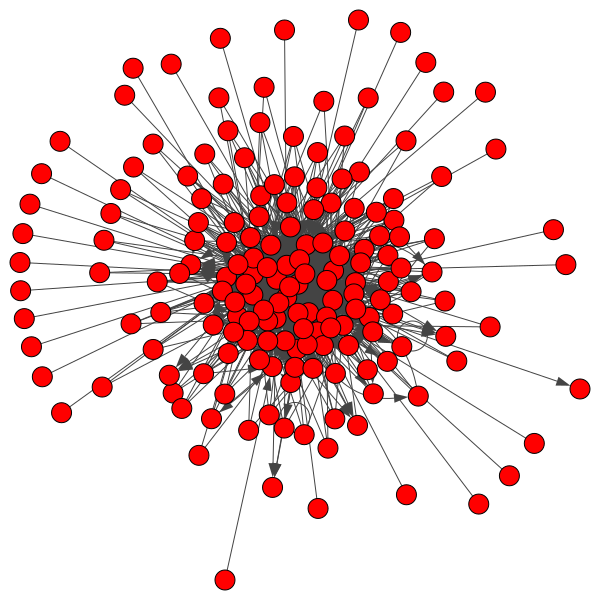

In [14]:
ig.plot(g)

In [15]:
g.diameter()

5

In [16]:
print( "Clustering Coefficient: ", g.transitivity_undirected())

Clustering Coefficient:  0.24672505151604357


In [17]:
np.mean(g.degree())

13.988505747126437

In [18]:
np.mean(g.strength(weights = 'weight'))

2489.183908045977

In [19]:
df_strength = pd.DataFrame({'name': list(g.vs['name']), 'weighted_degree':g.strength(weights = 'weight') } )
df_strength = df_strength.sort_values('weighted_degree', ascending = False).reset_index(drop = True)
df_strength

name  weighted_degree
0        British Virgin Islands         116270.0
1                        Panama          52007.0
2                     Hong Kong          39473.0
3                   Switzerland          38152.0
4                       Bahamas          20201.0
..                          ...              ...
169                      Malawi              1.0
170                       Nauru              1.0
171                       Sudan              1.0
172  Saint Martin (French part)              1.0
173                        Guam              1.0

[174 rows x 2 columns]

In [20]:
df_indegree = pd.DataFrame({'name': list(g.vs['name']), 'weighted_indegree':g.strength(weights = 'weight', mode = 'in') } )
df_indegree = df_indegree.sort_values('weighted_indegree', ascending = False).reset_index(drop = True)
df_indegree

name  weighted_indegree
0    British Virgin Islands           114858.0
1                    Panama            42243.0
2                   Bahamas            15532.0
3                Seychelles            14920.0
4                      Niue             9456.0
..                      ...                ...
169                 Finland                0.0
170                    Fiji                0.0
171                 Estonia                0.0
172             El Salvador                0.0
173                Zimbabwe                0.0

[174 rows x 2 columns]

In [21]:
df_outdegree = pd.DataFrame({'name': list(g.vs['name']), 'weighted_outdegree':g.strength(weights = 'weight', mode = 'out') } )
df_outdegree = df_outdegree.sort_values('weighted_outdegree', ascending = False).reset_index(drop = True)
df_outdegree

name  weighted_outdegree
0               Hong Kong             38957.0
1             Switzerland             38152.0
2                  Jersey             14528.0
3              Luxembourg             10864.0
4          United Kingdom             10195.0
..                    ...                 ...
169                 Dubai                 0.0
170     State of Delaware                 0.0
171               Wyoming                 0.0
172  Netherlands Antilles                 0.0
173                Nevada                 0.0

[174 rows x 2 columns]

## Metrics

In [19]:
def get_diameter(community):
    
    diameters = []
    
    for i in range(len(community.subgraphs())):
    
        diameters.append(community.subgraphs()[i].diameter())

    return (diameters)

In [20]:
def get_transitivity(community):
    
    transitivity = []
    
    for i in range(len(community.subgraphs())):
    
        transitivity.append(community.subgraphs()[i].transitivity_undirected())

    return (transitivity)

In [21]:
def get_avg_degree(community):
    
    degree = []
    
    for i in range(len(community.subgraphs())):
    
        degree.append(np.mean(community.subgraphs()[i].degree()))

    return degree

In [22]:
def get_avg_weighted_degree(community):
    
    weighted_degree = []
    
    for i in range(len(community.subgraphs())):
    
        weighted_degree.append(np.mean(community.subgraphs()[i].strength(weights = 'weight')))

    return weighted_degree

## Community Detection

In [23]:
# Define colors used for visualization
colors = ['blue', 'yellow', 'green','purple', 'pink', 'orange', 'lightcoral', 'plum', 'darkgreen', 'darkblue', 'rosybrown',
         'crimson', 'steelblue', 'khaki', 'moccasin', 'orangered', 'fuchsia', 'thistle', 'salmon', 'chocolate', 'lightseagreen',
         'springgreen', 'darkseagreen', 'deeppink', 'mediumvioletred','olive']

### Label Propogation Community Detection

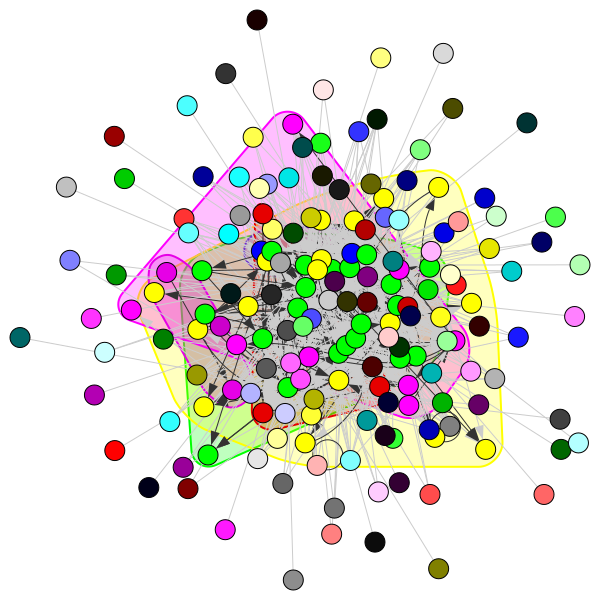

In [24]:
comm_lp= g.community_label_propagation(weights = 'weight')

ig.plot(comm_lp, mark_groups = True, layout="drl")

In [25]:
modularity = g.modularity(comm_lp, weights='weight')
print(modularity)

0.01434913403396466


In [26]:
#get metrics for each community

print('average weighted degree: ', get_avg_weighted_degree(comm_lp))
print('average degree: ', get_avg_degree(comm_lp))
print('transitivity: ', get_transitivity(comm_lp))
print('diameter: ', get_diameter(comm_lp))

average weighted degree:  [0.0, 10142.380952380952, 15.0, 218.11764705882354, 73.0, 0.0, 0.0, 82.66666666666667, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
average degree:  [0.0, 15.238095238095237, 1.0, 5.176470588235294, 4.0, 0.0, 0.0, 1.3333333333333333, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

### Leading Eigenvector Community Detection

/Users/susankoruthu/opt/anaconda3/lib/python3.8/site-packages/igraph/__init__.py:1281: RuntimeWarning: This method was developed for undirected graphs at src/community/leading_eigenvector.c:530
  membership, _, q = GraphBase.community_leading_eigenvector(


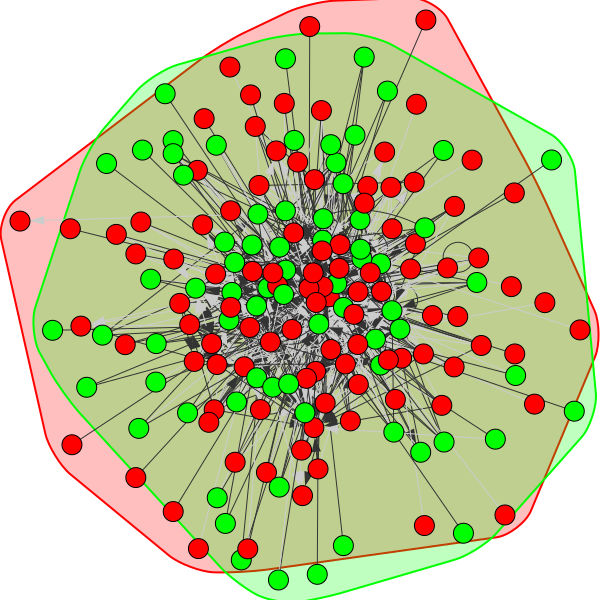

In [27]:
comm_leading_eigenvector= g.community_leading_eigenvector(weights = 'weight')

ig.plot(comm_leading_eigenvector, mark_groups = True, layout="drl")

In [28]:
modularity = g.modularity(comm_leading_eigenvector, weights='weight')
print(modularity)

0.13928311330179288


In [29]:
#get metrics for each community

print('average weighted degree: ', get_avg_weighted_degree(comm_leading_eigenvector))
print('average degree: ', get_avg_degree(comm_leading_eigenvector))
print('transitivity: ', get_transitivity(comm_leading_eigenvector))
print('diameter: ', get_diameter(comm_leading_eigenvector))

average weighted degree:  [896.2156862745098, 2705.4444444444443]
average degree:  [5.2745098039215685, 9.61111111111111]
transitivity:  [0.1493288590604027, 0.33534222987516143]
diameter:  [3, 4]


In [30]:
df_leading_eigenvector = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_leading_eigenvector.membership } )
df_leading_eigenvector

name  community
0                   Albania          0
1                   Bahamas          0
2                   Andorra          0
3    British Virgin Islands          1
4            Cayman Islands          1
..                      ...        ...
169               Venezuela          0
170                 Vietnam          1
171                   Yemen          0
172                  Zambia          1
173                Zimbabwe          0

[174 rows x 2 columns]

In [31]:
df_leading_eigenvector.describe()

community
count  174.000000
mean     0.413793
std      0.493934
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000

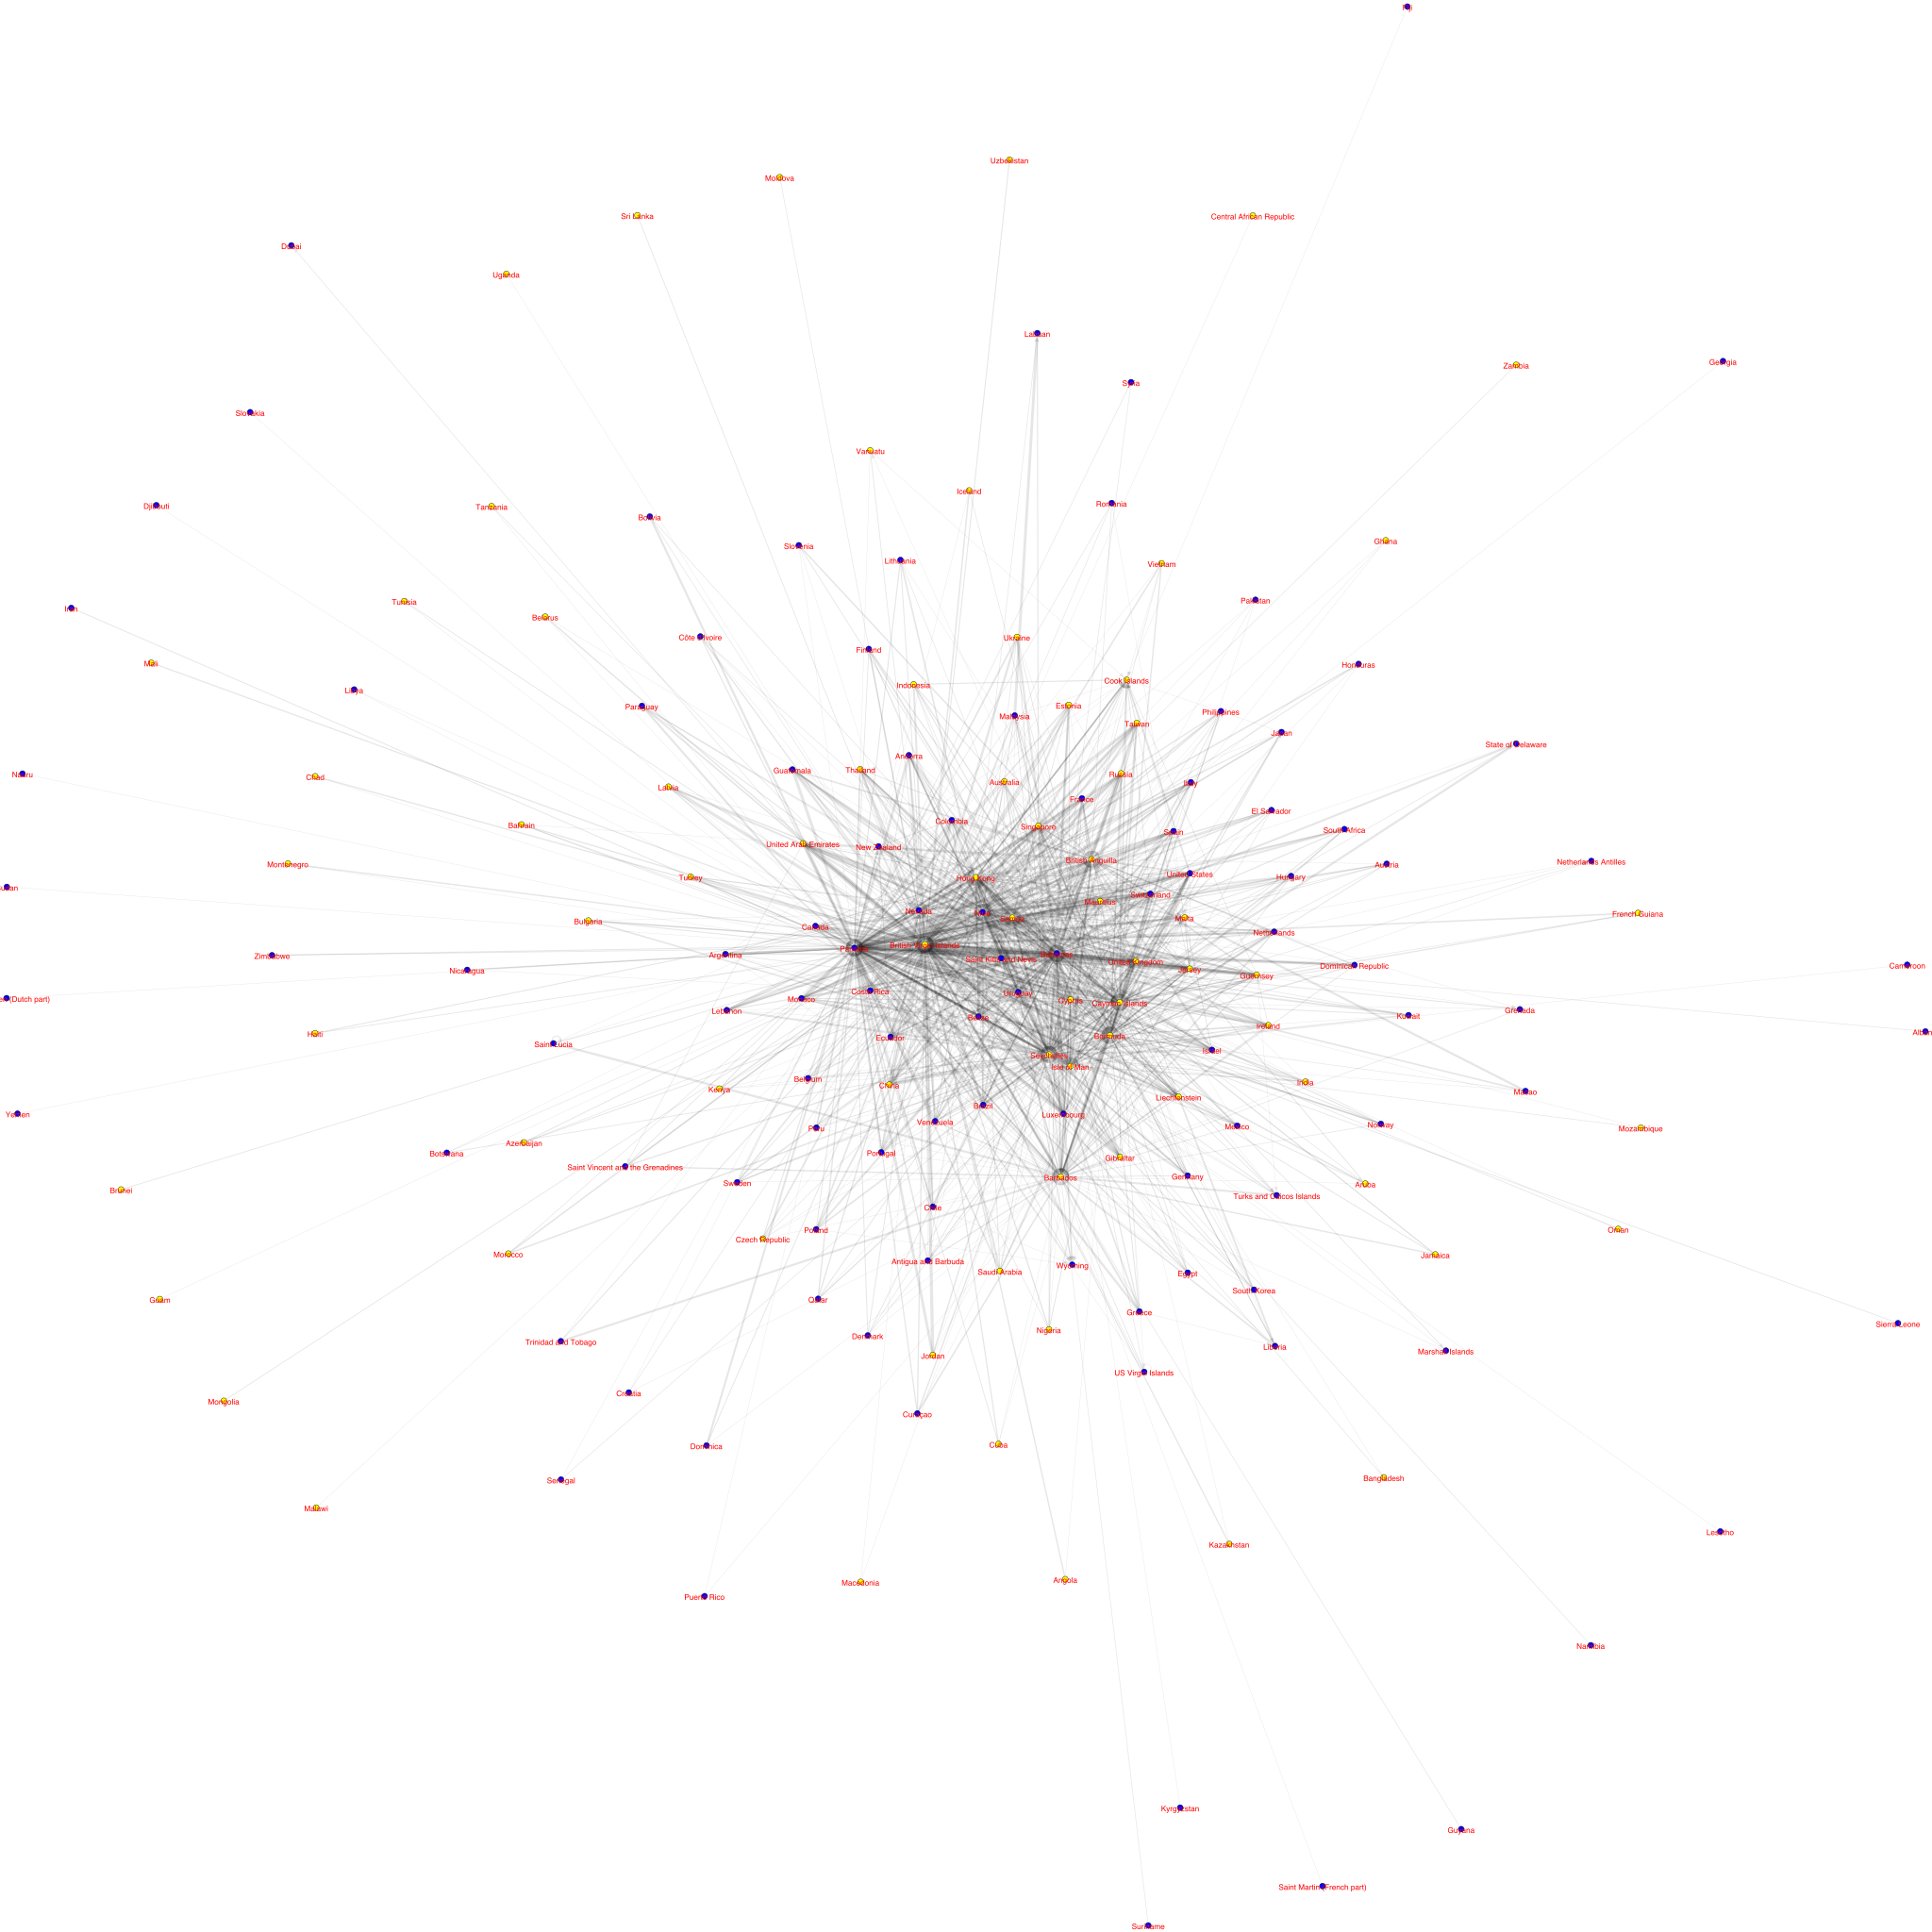

In [32]:
##plot community
visual_style = {}

vertex_colors = []

for i in range(len(comm_leading_eigenvector.membership)):
    vertex_colors.append(colors[comm_leading_eigenvector.membership[i]])
    
# Set bbox and margin
visual_style["bbox"] = (5000,5000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = vertex_colors

# Set edge width
visual_style["edge_width"] = np.log(g.es['weight']) + 1

# Set edge color
visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# Set vertex size
visual_style["vertex_size"] = 15

# Set vertex label size
visual_style["vertex_label_size"] = 20

# Set vertex label color
visual_style["vertex_label_color"] = 'red'

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_fruchterman_reingold()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'directed_jur_images/communities_leading_eigenvector.png', vertex_label = g.vs['name'] , **visual_style)

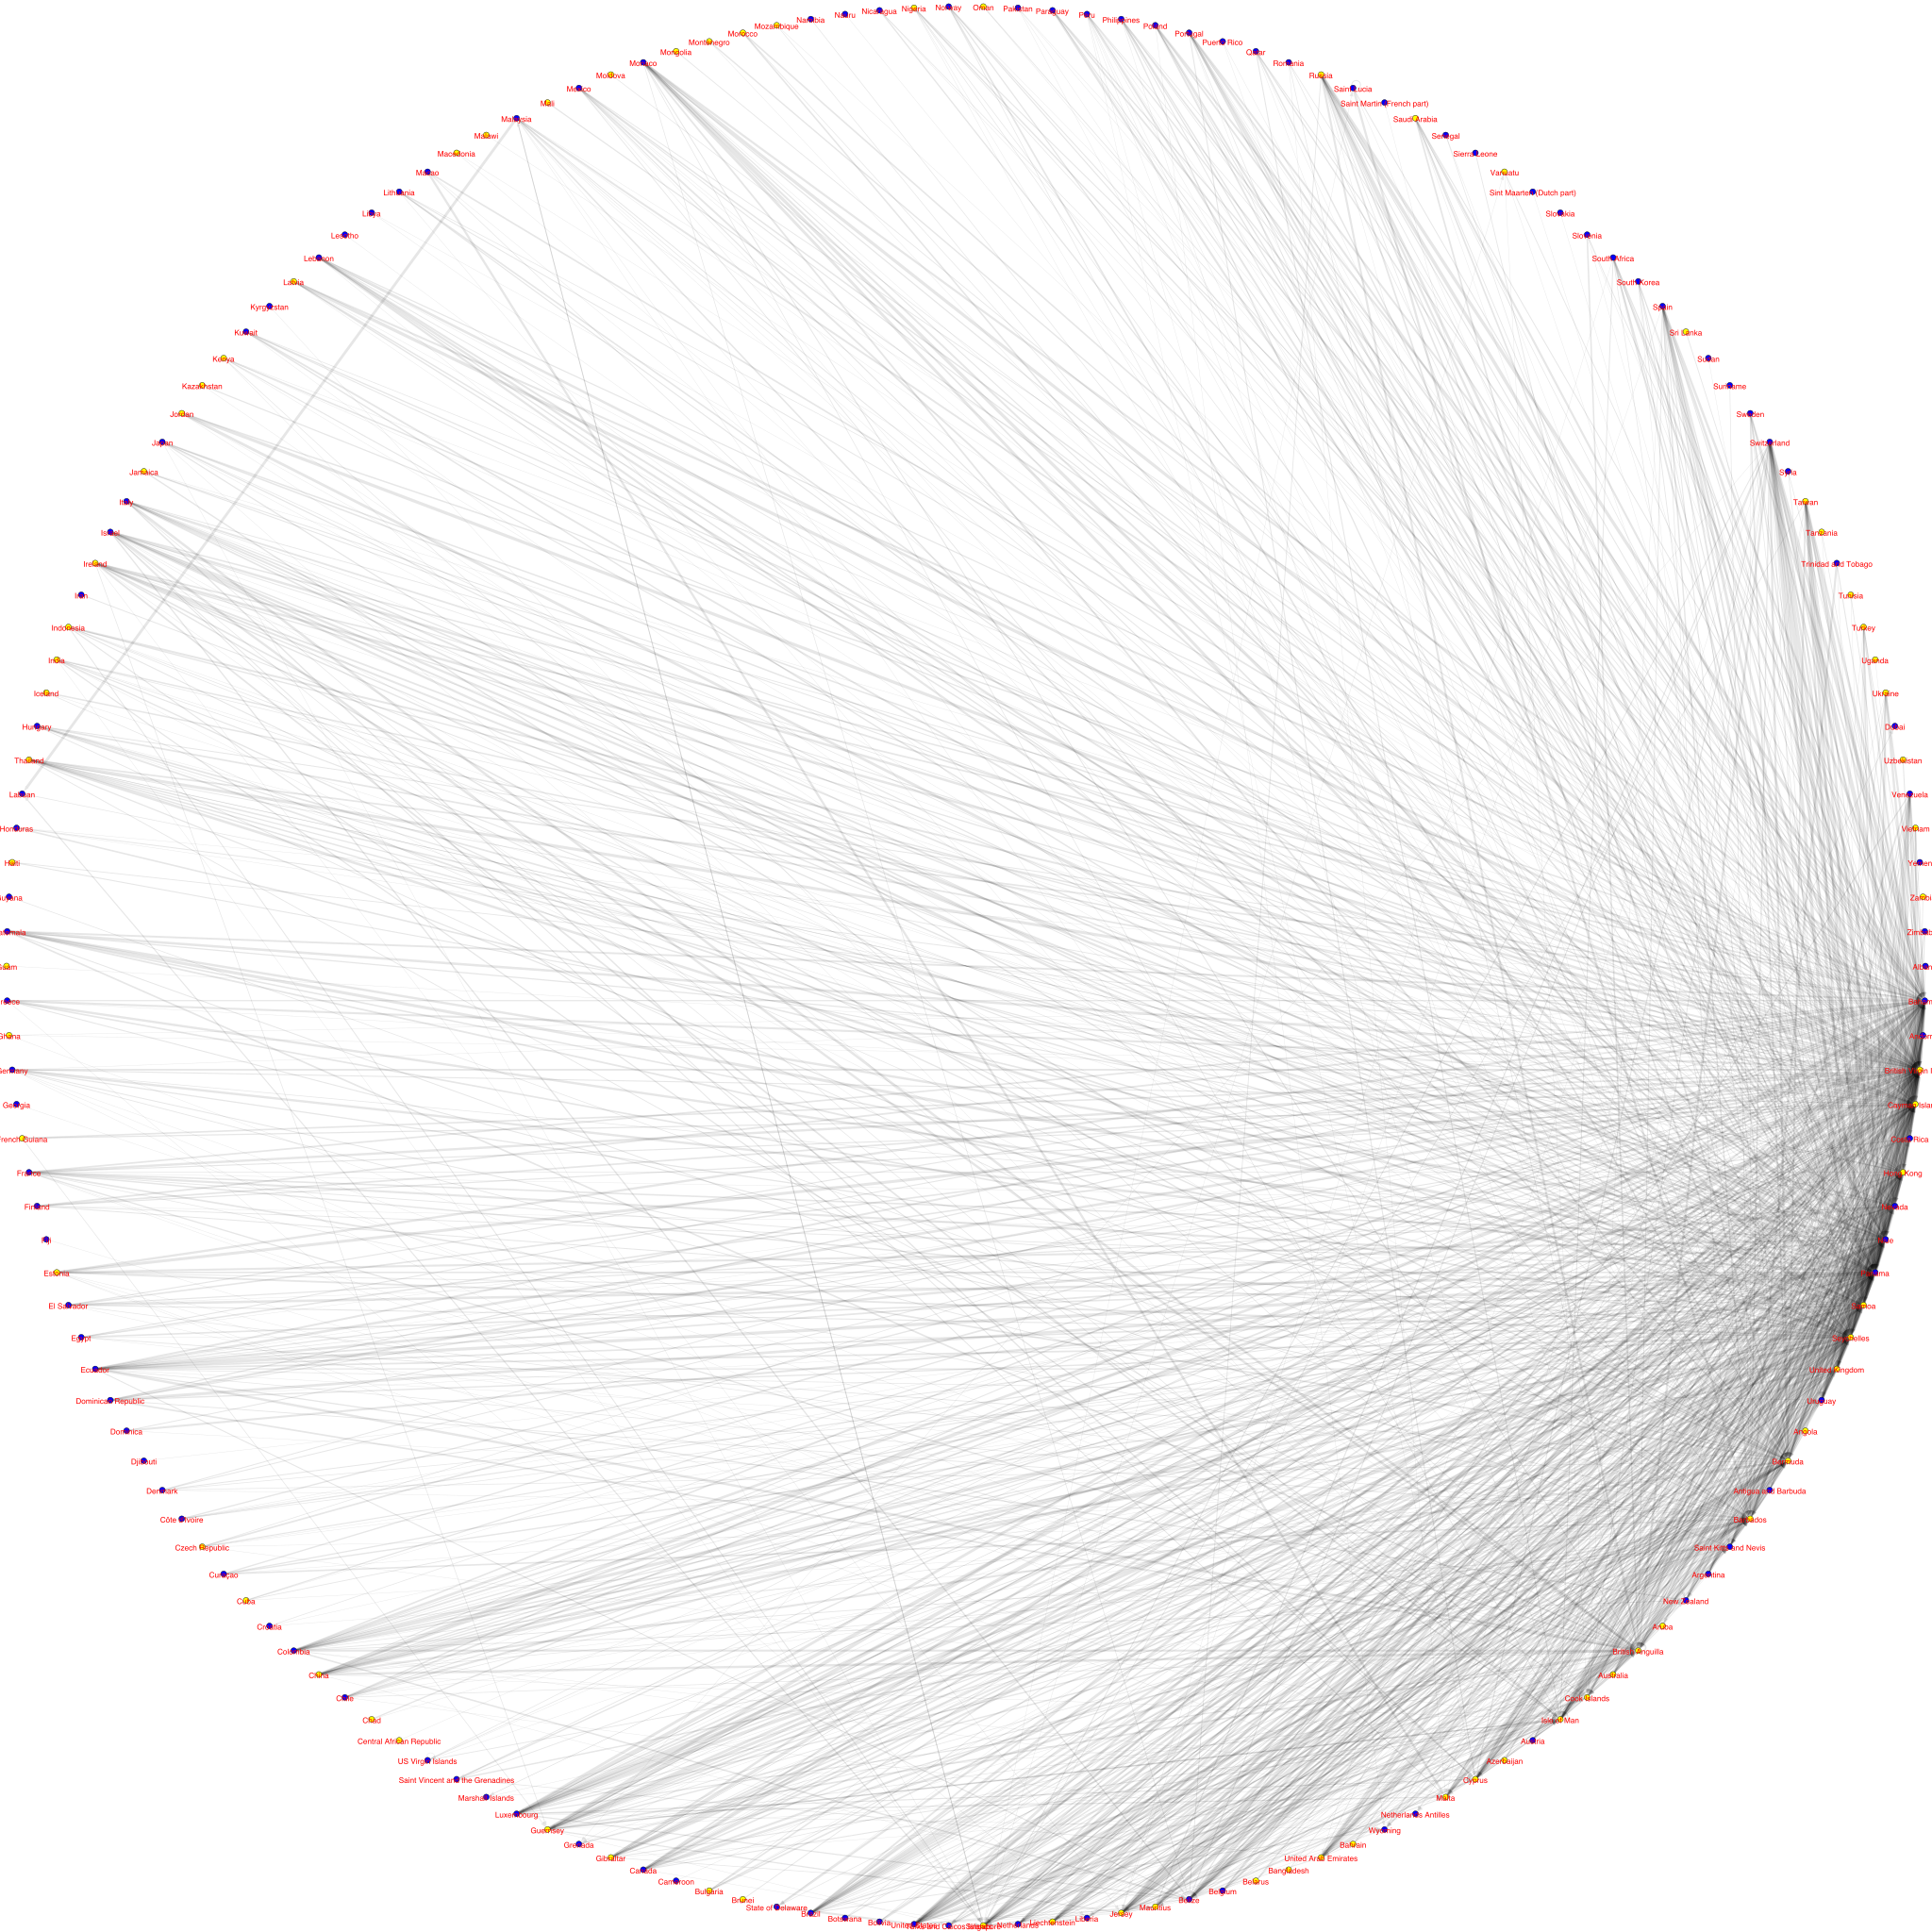

In [33]:
# Set the layout
my_layout = g.layout_circle()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'directed_jur_images/leading_vector_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [34]:
for i in range(len(comm_leading_eigenvector.subgraphs())):
    
    visual_style["bbox"] = (2000,2000)
    visual_style["margin"] = 17
    
    # Set vertex colours
    visual_style["vertex_color"] = 'green'

    # Set edge width
    visual_style["edge_width"] = np.log(comm_leading_eigenvector.subgraphs()[i].es['weight']) + 1
    # Set the layout
    my_layout = comm_leading_eigenvector.subgraphs()[i].layout_fruchterman_reingold()
    visual_style["layout"] = my_layout

    ig.plot(comm_leading_eigenvector.subgraphs()[i],'directed_jur_images/leading_eigenvector_subgraph' + str(i) + '.png' ,vertex_label = comm_leading_eigenvector.subgraphs()[i].vs['name'],**visual_style  )
    

### Spinglass Community Detection

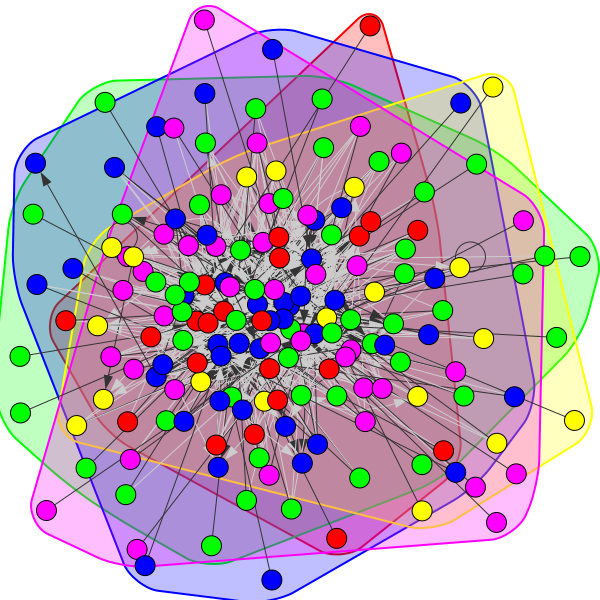

In [35]:
comm_spinglass = g.community_spinglass(weights = 'weight')

ig.plot(comm_spinglass, mark_groups = True, layout="drl")

In [36]:
modularity = g.modularity(comm_spinglass, weights='weight')
print(modularity)

0.10226247117800308


In [37]:
#get metrics for each community

print('average weighted degree: ', get_avg_weighted_degree(comm_spinglass))
print('average degree: ', get_avg_degree(comm_spinglass))
print('transitivity: ', get_transitivity(comm_spinglass))
print('diameter: ', get_diameter(comm_spinglass))

average weighted degree:  [308.72727272727275, 2336.72, 807.4418604651163, 93.47368421052632, 718.0]
average degree:  [2.6363636363636362, 3.68, 6.604651162790698, 2.1052631578947367, 2.3]
transitivity:  [0.11764705882352941, 0.1301564722617354, 0.3583916083916084, 0.0, 0.0234375]
diameter:  [3, 6, 4, 1, 2]


In [38]:
df_spinglass = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_spinglass.membership } )
df_spinglass

name  community
0                   Albania          0
1                   Bahamas          0
2                   Andorra          4
3    British Virgin Islands          1
4            Cayman Islands          2
..                      ...        ...
169               Venezuela          4
170                 Vietnam          2
171                   Yemen          4
172                  Zambia          1
173                Zimbabwe          4

[174 rows x 2 columns]

In [39]:
df_spinglass.describe()

community
count  174.000000
mean     2.028736
std      1.353344
min      0.000000
25%      1.000000
50%      2.000000
75%      3.000000
max      4.000000

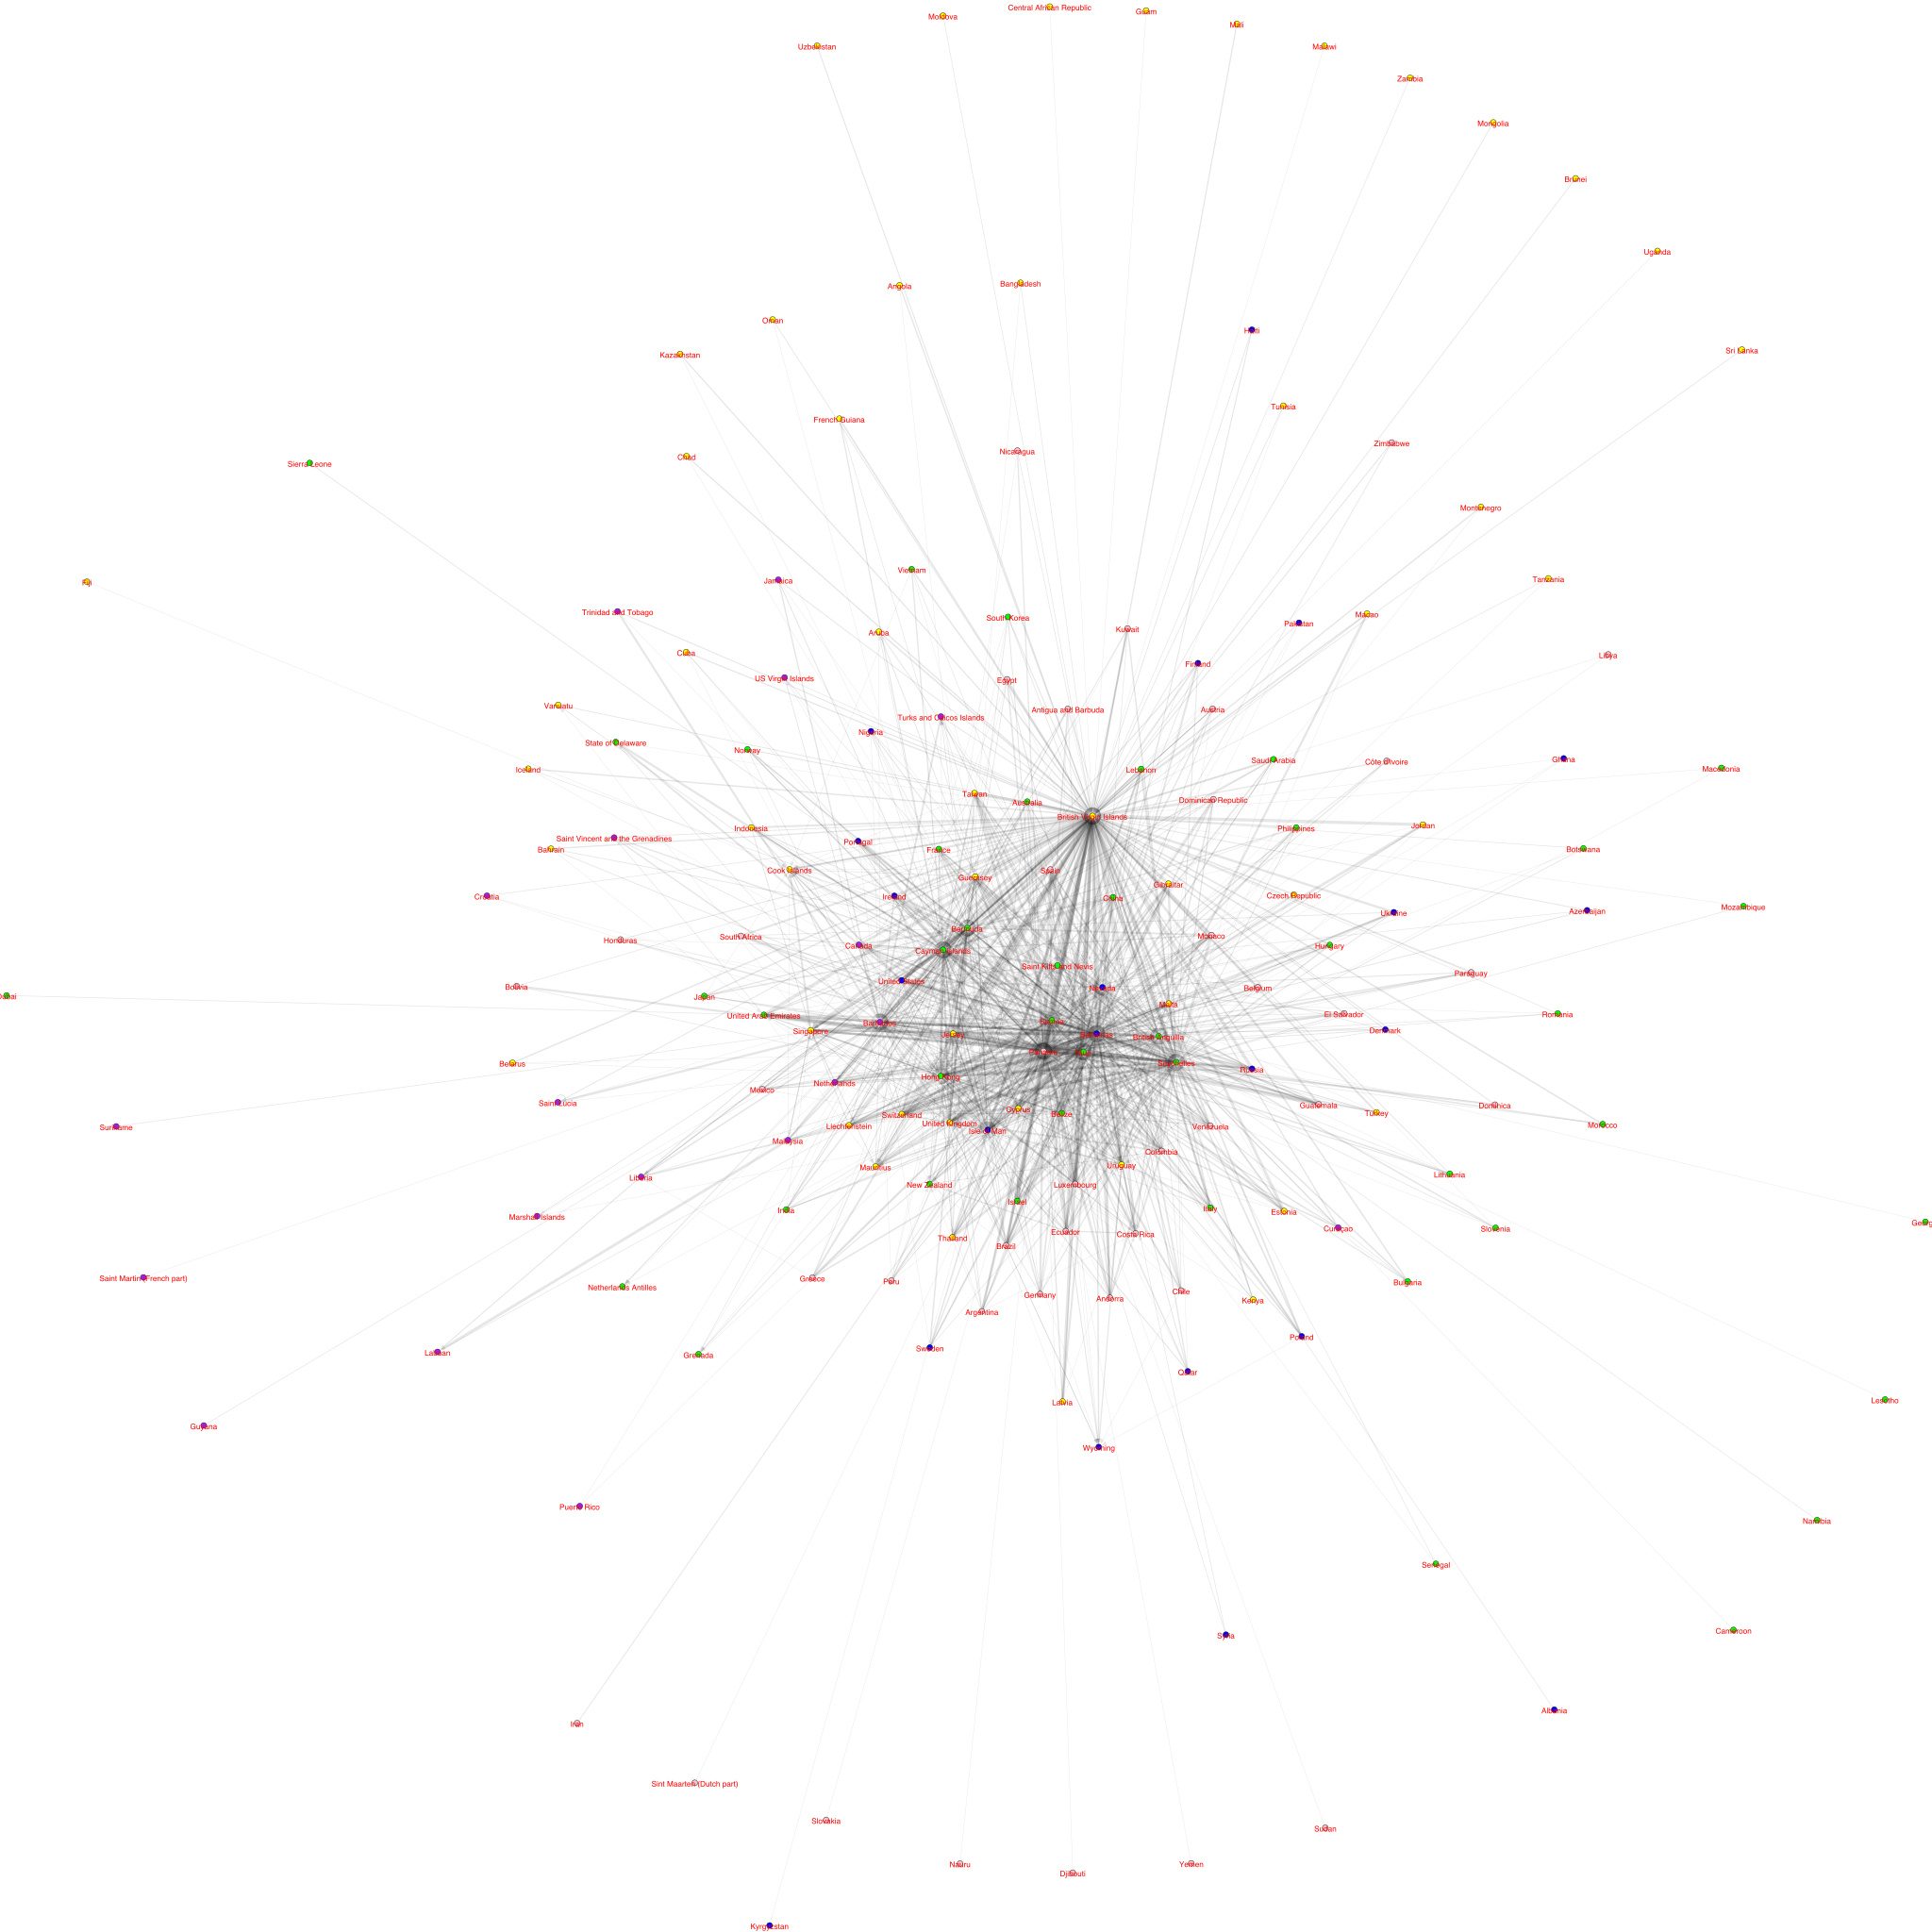

In [40]:
##plot community
visual_style = {}

vertex_colors = []

for i in range(len(comm_spinglass.membership)):
    vertex_colors.append(colors[comm_spinglass.membership[i]])
    
# Set bbox and margin
visual_style["bbox"] = (5000,5000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = vertex_colors

# Set edge width
visual_style["edge_width"] = np.log(g.es['weight']) + 1

# Set edge color
visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# Set vertex size
visual_style["vertex_size"] = 15

# Set vertex label size
visual_style["vertex_label_size"] = 20

# Set vertex label color
visual_style["vertex_label_color"] = 'red'

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_fruchterman_reingold()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'directed_jur_images/communities_spinglass.png', vertex_label = g.vs['name'] , **visual_style)

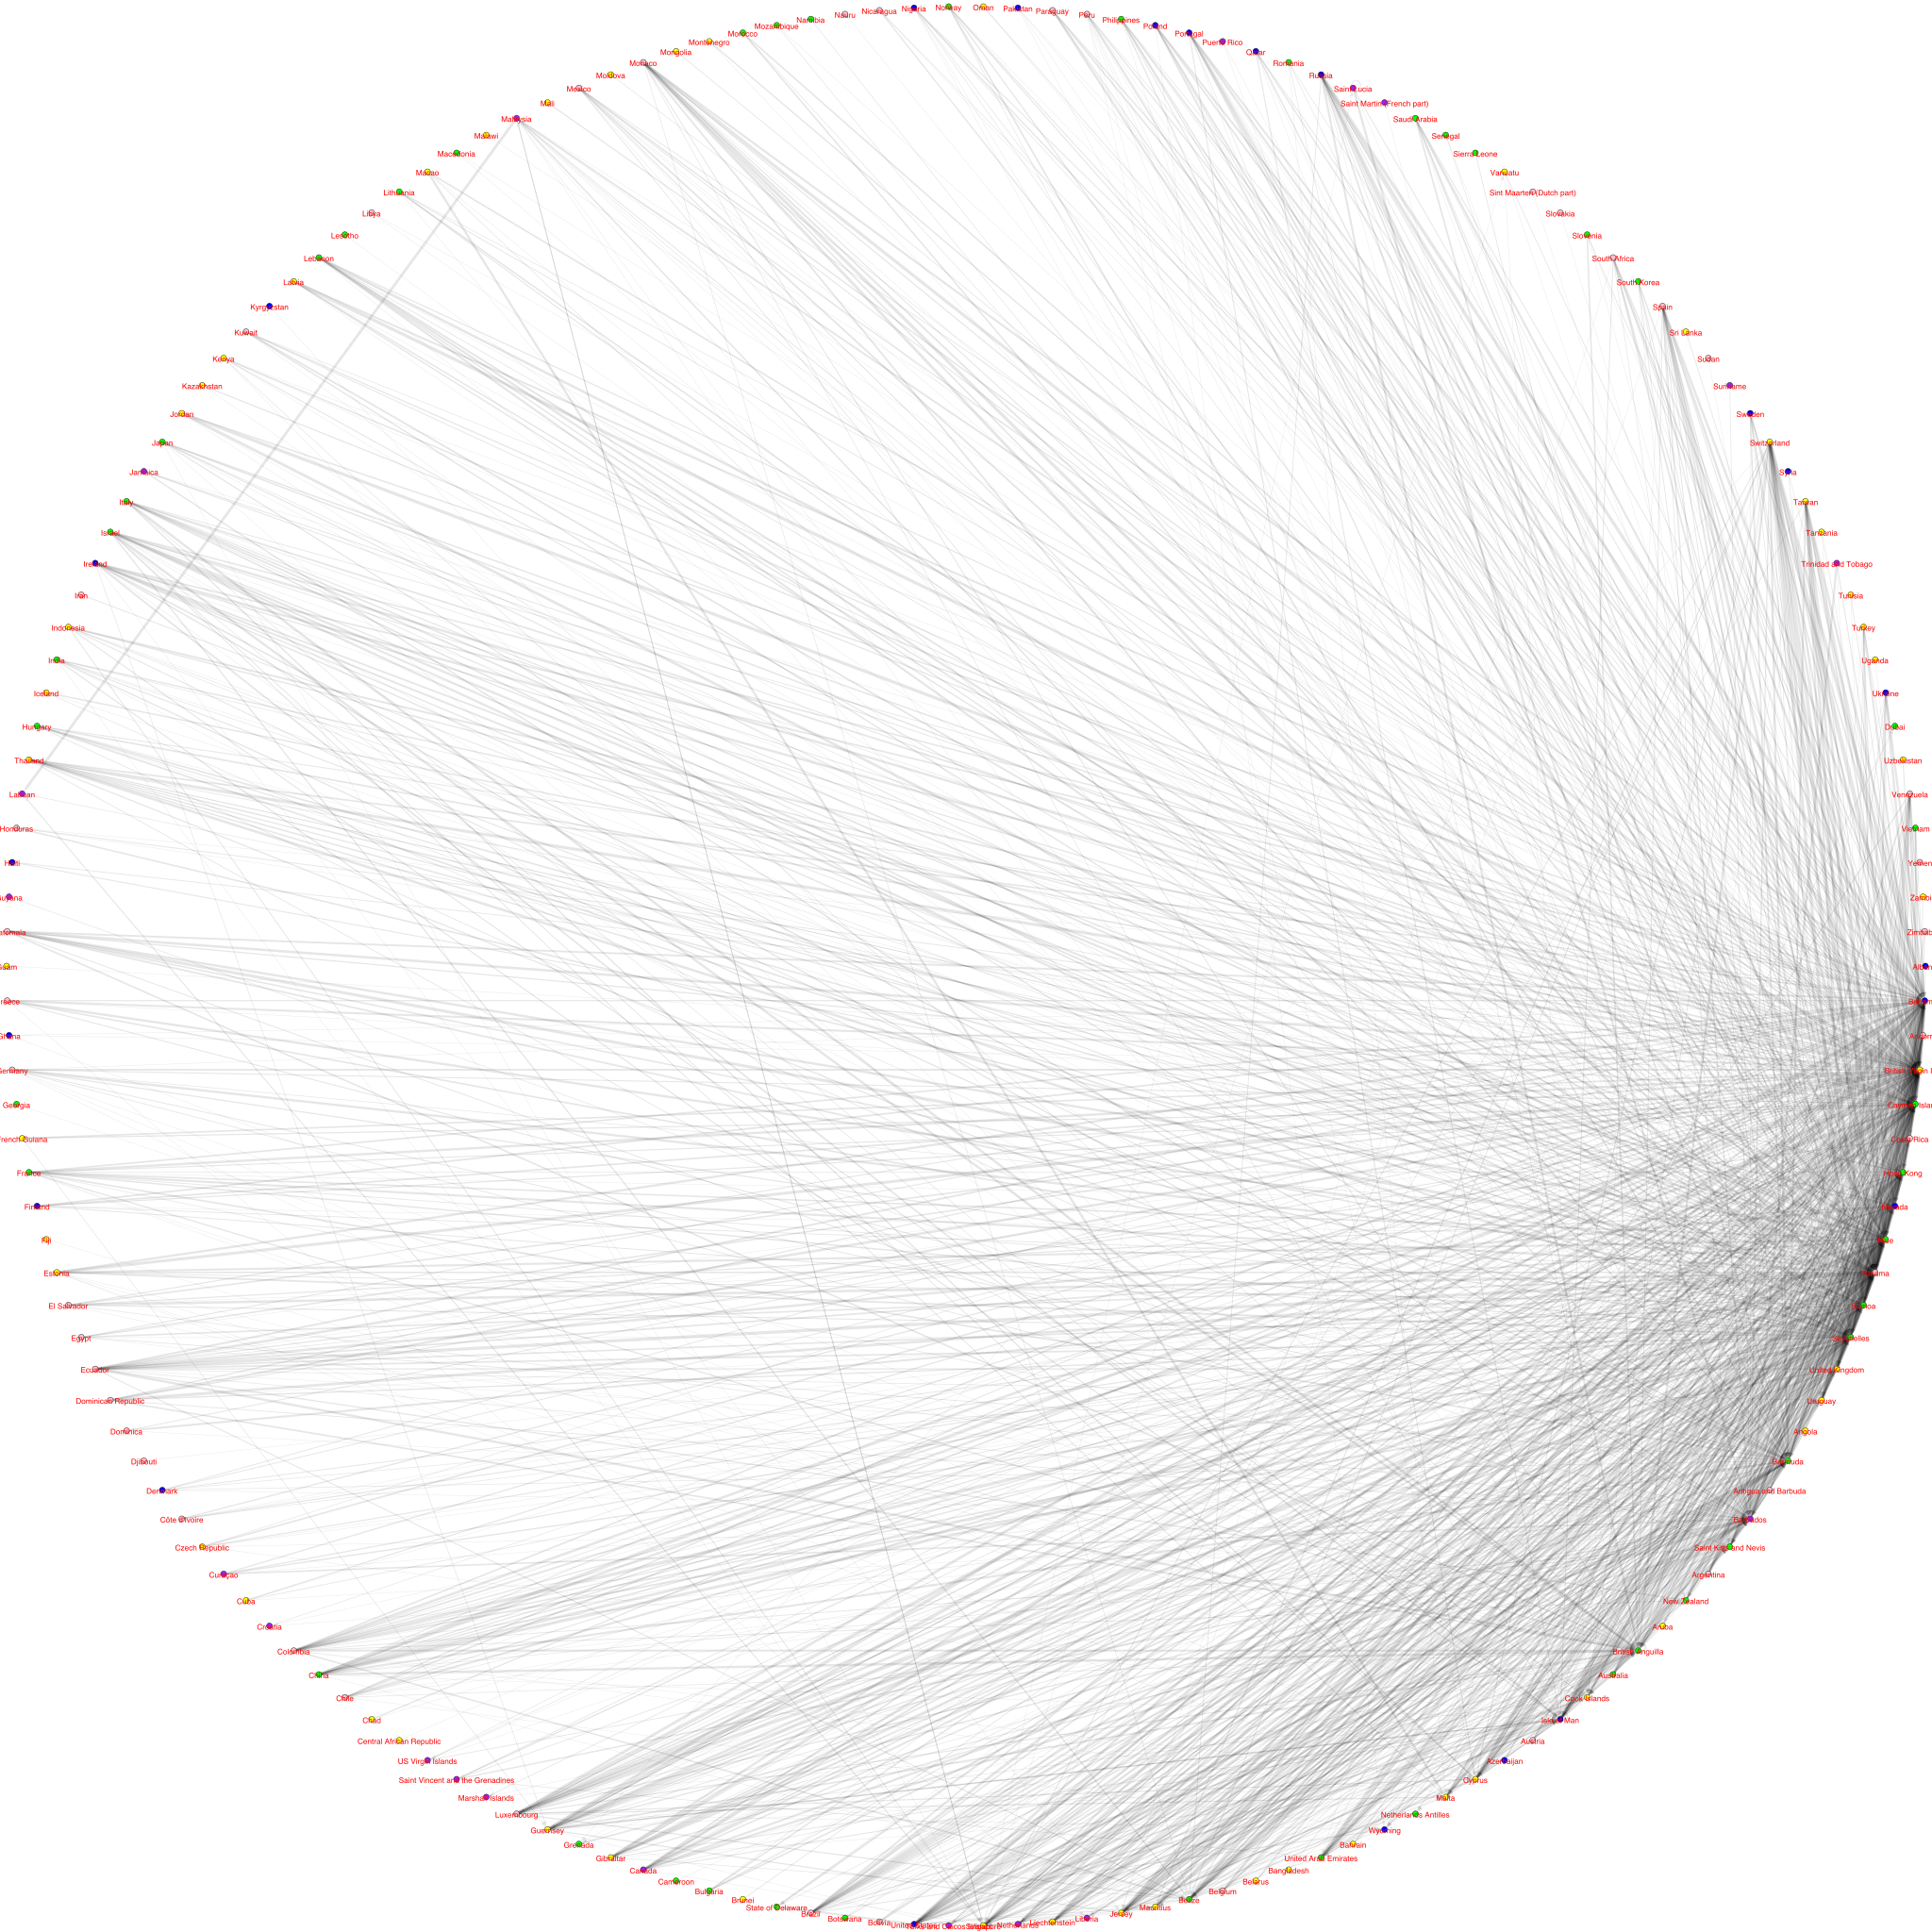

In [41]:
# Set the layout
my_layout = g.layout_circle()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'directed_jur_images/spinglass_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [42]:
for i in range(len(comm_spinglass.subgraphs())):
    
    visual_style["bbox"] = (2000,2000)
    visual_style["margin"] = 17
    
    # Set vertex colours
    visual_style["vertex_color"] = 'green'

    # Set edge width
    visual_style["edge_width"] = np.log(comm_spinglass.subgraphs()[i].es['weight']) + 1
    # Set the layout
    my_layout = comm_spinglass.subgraphs()[i].layout_fruchterman_reingold()
    visual_style["layout"] = my_layout

    ig.plot(comm_spinglass.subgraphs()[i],'directed_jur_images/spinglass_subgraph' + str(i) + '.png' ,vertex_label = comm_spinglass.subgraphs()[i].vs['name'],**visual_style  )
    

### Walktrap Community Detection

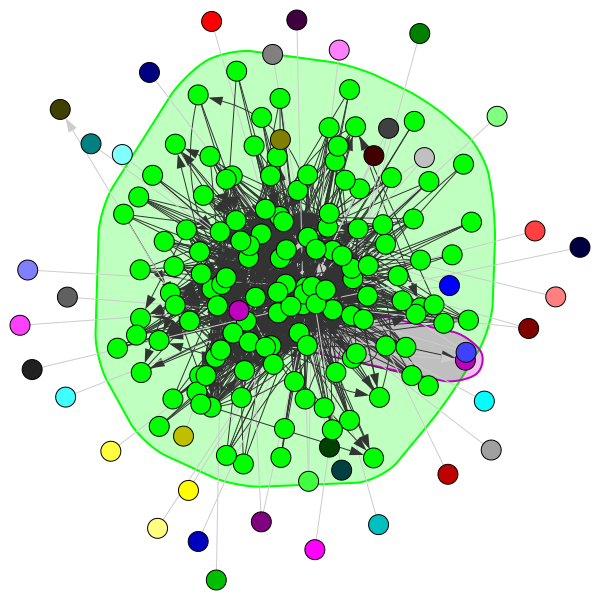

In [43]:
walktrap = g.community_walktrap(weights = 'weight', steps = 2)

comm_walktrap = walktrap.as_clustering()

ig.plot(comm_walktrap, mark_groups = True, layout="drl")

In [44]:
modularity = g.modularity(comm_walktrap, weights='weight')
print(modularity)

0.003887288169812182


In [45]:
#get metrics for each community

print('average weighted degree: ', get_avg_weighted_degree(comm_walktrap))
print('average degree: ', get_avg_degree(comm_walktrap))
print('transitivity: ', get_transitivity(comm_walktrap))
print('diameter: ', get_diameter(comm_walktrap))

average weighted degree:  [0.0, 3272.1363636363635, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 422.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
average degree:  [0.0, 17.439393939393938, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
transitivity:  [nan, 0.27605592593366635, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
diameter:  [0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [46]:
df_walktrap = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_walktrap.membership } )
df_walktrap

name  community
0                   Albania          0
1                   Bahamas          1
2                   Andorra          1
3    British Virgin Islands          1
4            Cayman Islands          1
..                      ...        ...
169               Venezuela          1
170                 Vietnam          1
171                   Yemen         40
172                  Zambia         41
173                Zimbabwe          1

[174 rows x 2 columns]

In [47]:
df_walktrap.describe()

community
count  174.000000
mean     5.764368
std     10.282523
min      0.000000
25%      1.000000
50%      1.000000
75%      1.000000
max     41.000000

In [48]:
# ##plot community
# visual_style = {}

# vertex_colors = []

# for i in range(len(comm_walktrap.membership)):
#     vertex_colors.append(colors[comm_walktrap.membership[i]])
    
# # Set bbox and margin
# visual_style["bbox"] = (5000,5000)
# visual_style["margin"] = 17

# # Set vertex colours
# visual_style["vertex_color"] = vertex_colors

# # Set edge width
# visual_style["edge_width"] = np.log(g.es['weight']) + 1

# # Set edge color
# visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# # Set vertex size
# visual_style["vertex_size"] = 15

# # Set vertex label size
# visual_style["vertex_label_size"] = 20

# # Set vertex label color
# visual_style["vertex_label_color"] = 'red'

# # Don't curve the edges
# visual_style["edge_curved"] = False

# # Set the layout
# my_layout = g.layout_fruchterman_reingold()
# visual_style["layout"] = my_layout

# # Plot the graph
# ig.plot(g,'directed_jur_images/communities_walktrap.png', vertex_label = g.vs['name'] , **visual_style)

In [49]:
# # Set the layout
# my_layout = g.layout_circle()
# visual_style["layout"] = my_layout

# # Plot the graph
# ig.plot(g,'directed_jur_images/walktrap_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [50]:
# for i in range(len(comm_walktrap.subgraphs())):
    
#     visual_style["bbox"] = (2000,2000)
#     visual_style["margin"] = 17
    
#     # Set vertex colours
#     visual_style["vertex_color"] = 'green'

#     # Set edge width
#     visual_style["edge_width"] = np.log(comm_walktrap.subgraphs()[i].es['weight']) + 1
#     # Set the layout
#     my_layout = comm_walktrap.subgraphs()[i].layout_fruchterman_reingold()
#     visual_style["layout"] = my_layout

#     ig.plot(comm_walktrap.subgraphs()[i],'directed_jur_images/walktrap_subgraph' + str(i) + '.png' ,vertex_label = comm_walktrap.subgraphs()[i].vs['name'],**visual_style  )
    

### Infomap Community Detection

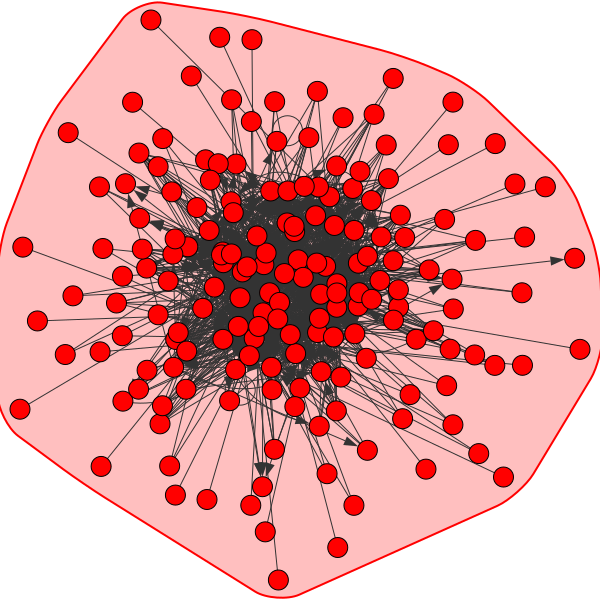

In [51]:
comm_infomap = g.community_infomap(edge_weights = 'weight')

ig.plot(comm_infomap, mark_groups = True, layout="drl")

In [52]:
modularity = g.modularity(comm_infomap, weights='weight')
print(modularity)

0.0


In [53]:
#get metrics for each community

print('average weighted degree: ', get_avg_weighted_degree(comm_infomap))
print('average degree: ', get_avg_degree(comm_infomap))
print('transitivity: ', get_transitivity(comm_infomap))
print('diameter: ', get_diameter(comm_infomap))

average weighted degree:  [2489.183908045977]
average degree:  [13.988505747126437]
transitivity:  [0.24672505151604357]
diameter:  [5]


In [54]:
df_infomap = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_infomap.membership } )
df_infomap

name  community
0                   Albania          0
1                   Bahamas          0
2                   Andorra          0
3    British Virgin Islands          0
4            Cayman Islands          0
..                      ...        ...
169               Venezuela          0
170                 Vietnam          0
171                   Yemen          0
172                  Zambia          0
173                Zimbabwe          0

[174 rows x 2 columns]

In [55]:
## no visualisation since no community is detected